# EDA - Análisis Exploratorio de Datos - Coursera

## En este Notebook se realiza un análisis pormenorizado de los cursos MOOC de la plataforma Coursera a partir de los datasets provistos y complementarios.

### Se importan las Librerías a utilizar

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

### Se inicia el análisis con los dos datasets provistos

### Se lee el primer archivo:  Coursera_courses.csv

In [28]:
coursera1 = pd.read_csv('../Moocs/DataSets_provistos/Coursera_courses.csv')
coursera1.head(3)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being


In [29]:
coursera1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [30]:
coursera1['name'].unique

<bound method Series.unique of 0                                       Machine Learning
1                                      Indigenous Canada
2                              The Science of Well-Being
3                         Technical Support Fundamentals
4      Become a CBRS Certified Professional Installer...
                             ...                        
618                Accounting Data Analytics with Python
619               Introduction to Molecular Spectroscopy
620                                  Managing as a Coach
621               The fundamentals of hotel distribution
622                       A Crash Course in Data Science
Name: name, Length: 623, dtype: object>

In [31]:
coursera1['institution'].value_counts()

institution
University of Pennsylvania       43
University of Michigan           31
Duke University                  24
Google Cloud                     22
IBM                              18
                                 ..
EDHEC Business School             1
INSEAD                            1
Google - Spectrum Sharing         1
New York Institute of Finance     1
UCL School of Management          1
Name: count, Length: 134, dtype: int64

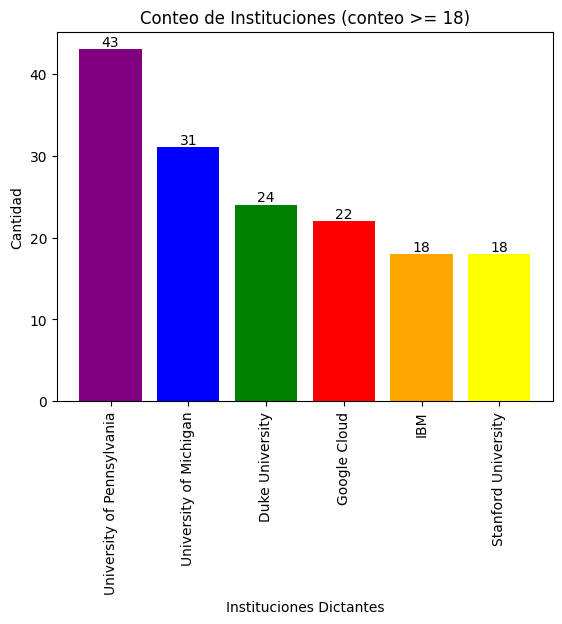

In [32]:
counts = coursera1['institution'].value_counts()
counts = counts[counts >= 18]  # Se filtran las instituciones con conteo mayor o igual a 15

# Se generar una lista de colores para cada barra
num_bars = len(counts)
colors = ['purple', 'blue','green', 'red', 'orange', 'yellow' ][:num_bars]  # Puedes agregar más colores si es necesario

plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Instituciones Dictantes')
plt.ylabel('Cantidad')
plt.title('Conteo de Instituciones (conteo >= 18)')
plt.xticks(rotation=90)
for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

### Se lee el segundo archivo:  Coursera_reviews.csv

In [33]:
coursera2 = pd.read_csv('../Moocs/DataSets_provistos/Coursera_reviews.csv')
coursera2.head(3)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training


In [34]:
coursera2.describe(include=['object']).T

,count,unique,top,freq
reviews,1454558,458275,good,8827
reviewers,1454711,287808,By Deleted A,5412
date_reviews,1454711,1892,"May 25, 2020",5394
course_id,1454711,604,python,45218


In [35]:
coursera2.shape

(1454711, 5)

In [36]:
coursera2['date_reviews'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Feb 12, 2020
1          Sep 28, 2020
2          Apr 08, 2020
3          Feb 24, 2020
4          Jun 18, 2020
               ...     
1454706    Aug 25, 2020
1454707    Jul 02, 2020
1454708    Jun 20, 2020
1454709    Jun 07, 2020
1454710    Aug 12, 2018
Name: date_reviews, Length: 1454711, dtype: object>

In [37]:
# Se extrae el año del campo "date_reviews" y se almacena en una nueva columna llamada "year"
coursera2['year'] = pd.to_datetime(coursera2['date_reviews']).dt.year

# Se cuentan los valores únicos de cada año y se muestra el resultado
coursera2['year'].value_counts()

year
2020    754591
2019    239345
2018    162191
2017    158790
2016    107508
2015     32286
Name: count, dtype: int64

In [38]:
# Se crea un DataFrame para los registros del año 2020, ordenado por rating
coursera2_2020 = coursera2[coursera2['year'] == 2020]
coursera2_2020 = coursera2_2020.sort_values('rating', ascending=False)
coursera2_2020


,reviews,reviewers,date_reviews,rating,course_id,year
726618,Excellent.,By K. M G,"Jul 11, 2020",5,aws-fundamentals-going-cloud-native,2020
920596,The course was awesome and it was a fun ride.T...,By UMESH K R,"May 22, 2020",5,electronics,2020
920599,Very useful course. It really helped me unders...,By Raghav V,"Apr 17, 2020",5,electronics,2020
920600,I really got true knowledge. I am really very ...,By MUHAMMAD F A,"Apr 01, 2020",5,electronics,2020
920602,I really loved that course specially instructo...,By Ananya B,"Jul 10, 2020",5,electronics,2020
...,...,...,...,...,...,...
884940,Worst Course ever! Didn't get a reset on week ...,By Harshit G,"Jul 08, 2020",1,python-databases,2020
884935,the instructor didn't rate. its pending for lo...,By Barath G,"Jun 22, 2020",1,python-databases,2020
884934,"Not necessarily a bad course, but the final as...",By Corwin A,"Jul 01, 2020",1,python-databases,2020
884933,I have submitted week 5 assignment Databases a...,By Sarthak S,"Apr 30, 2020",1,python-databases,2020


In [39]:
# Se crea un DataFrame para los registros del año 2019, ordenado por rating
coursera2_2019 = coursera2[coursera2['year'] == 2019]
coursera2_2019 = coursera2_2019.sort_values('rating', ascending=False)
coursera2_2019.head(3)

,reviews,reviewers,date_reviews,rating,course_id,year
683094,it was the good online resource for the studen...,By Aqil A,"Nov 21, 2019",5,vital-signs,2019
869422,Curso Incrível!,By Ingrid L,"Aug 05, 2019",5,estrategia-marketing-digital,2019
869396,Excelente base.,By Fausto R d B,"Oct 07, 2019",5,estrategia-marketing-digital,2019


## Se inicia el análisis de .csv adicionales

In [40]:
coursera = pd.read_csv('../Moocs/DataSets_adicionales/webautomation_coursera.csv')
coursera.head(3)

,url,title,associated-university-institution-company,type,image,category-subject-area,certificate-is-available,description,duration,language,level,prerequisites,price,rating,syllabus,timestamp
0,https://www.coursera.org/specializations/netwo...,Networking in Google Cloud Specialization,Google Cloud,specializations,https://s3.amazonaws.com/coursera_assets/meta_...,Networking,Shareable Certificate,This specialization gives participants broad s...,Approximately 4 months to complete,English,Intermediate Level,-,free,4.8,-,2022-07-29T23:58:34Z
1,https://www.coursera.org/learn/2-speed-it,Two Speed IT: How Companies Can Surf the Digit...,CentraleSupélec,course,https://s3.amazonaws.com/coursera_assets/meta_...,Business Essentials,Shareable Certificate,"Transform or disappear, the Darwinism of IT: I...",Approx. 14 hours to complete,English,-,-,free,4.3,Introduction ~.~ Start here! ~.~ IT and the CI...,2022-07-29T23:58:34Z
2,https://www.coursera.org/learn/fundamentals-ne...,Fundamentals of Network Communication,University of Colorado System,course,https://s3.amazonaws.com/coursera_assets/meta_...,Computer Security and Networks,Shareable Certificate,"In this course, we trace the evolution of netw...",Approx. 15 hours to complete,English,Intermediate Level,-,free,4.6,Communication Networks and Services ~.~ This m...,2022-07-29T23:58:54Z


In [41]:
coursera.shape

(242, 16)

In [42]:
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   url                                        242 non-null    object
 1   title                                      242 non-null    object
 2   associated-university-institution-company  242 non-null    object
 3   type                                       242 non-null    object
 4   image                                      242 non-null    object
 5   category-subject-area                      242 non-null    object
 6   certificate-is-available                   242 non-null    object
 7   description                                242 non-null    object
 8   duration                                   242 non-null    object
 9   language                                   242 non-null    object
 10  level                                 

In [43]:
coursera['rating'].value_counts()

rating
4.8    78
4.7    47
4.9    41
4.6    40
-      21
4.5     8
4.3     2
4       2
4.4     2
4.2     1
Name: count, dtype: int64

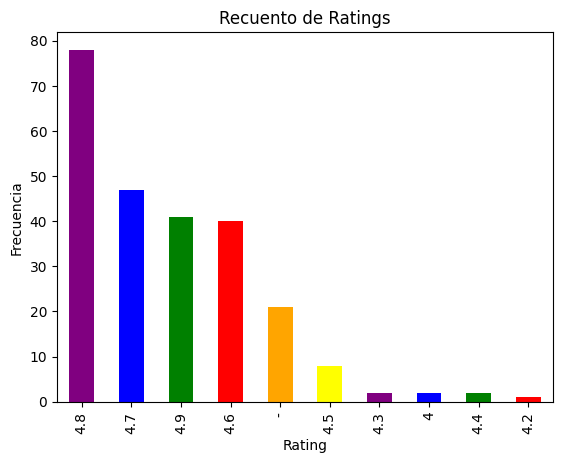

In [44]:
# Se realiza el recuento de valores en la columna "rating"
recuento_ratings = coursera['rating'].value_counts()

# Se genera una lista de colores para cada barra
num_bars = len(recuento_ratings)
colors = ['purple', 'blue', 'green', 'red', 'orange', 'yellow'][:num_bars]

# Se crea el gráfico de barras
recuento_ratings.plot(kind='bar', color=colors)

# Se configuran los títulos y etiquetas del gráfico
plt.title('Recuento de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')

# Se muestra el gráfico
plt.show()


In [45]:
coursera = coursera[coursera['rating'] != '-']
coursera.shape

(221, 16)

In [46]:
coursera.head(5)

,url,title,associated-university-institution-company,type,image,category-subject-area,certificate-is-available,description,duration,language,level,prerequisites,price,rating,syllabus,timestamp
0,https://www.coursera.org/specializations/netwo...,Networking in Google Cloud Specialization,Google Cloud,specializations,https://s3.amazonaws.com/coursera_assets/meta_...,Networking,Shareable Certificate,This specialization gives participants broad s...,Approximately 4 months to complete,English,Intermediate Level,-,free,4.8,-,2022-07-29T23:58:34Z
1,https://www.coursera.org/learn/2-speed-it,Two Speed IT: How Companies Can Surf the Digit...,CentraleSupélec,course,https://s3.amazonaws.com/coursera_assets/meta_...,Business Essentials,Shareable Certificate,"Transform or disappear, the Darwinism of IT: I...",Approx. 14 hours to complete,English,-,-,free,4.3,Introduction ~.~ Start here! ~.~ IT and the CI...,2022-07-29T23:58:34Z
2,https://www.coursera.org/learn/fundamentals-ne...,Fundamentals of Network Communication,University of Colorado System,course,https://s3.amazonaws.com/coursera_assets/meta_...,Computer Security and Networks,Shareable Certificate,"In this course, we trace the evolution of netw...",Approx. 15 hours to complete,English,Intermediate Level,-,free,4.6,Communication Networks and Services ~.~ This m...,2022-07-29T23:58:54Z
3,https://www.coursera.org/learn/ux-design-jobs,Design a User Experience for Social Good & Pre...,Google,course,https://s3.amazonaws.com/coursera_assets/meta_...,Design and Product,Shareable Certificate,Design a User Experience for Social Good and P...,Approx. 71 hours to complete,English,Beginner Level,-,free,4.8,"Starting the UX design process: empathize, def...",2022-07-29T23:59:20Z
4,https://www.coursera.org/learn/database-applic...,Building Database Applications in PHP,University of Michigan,course,https://s3.amazonaws.com/coursera_assets/meta_...,Mobile and Web Development,Shareable Certificate,"In this course, we'll look at the object orien...",Approx. 24 hours to complete,English,Intermediate Level,-,free,4.9,PHP Objects ~.~ We look at the object oriented...,2022-07-29T23:59:20Z


In [48]:
# Se convierte a tipo float
coursera['rating'] = coursera['rating'].astype('float')
#  Se filtran los valores de rating entre 4.6 y 4.9
filtro = (coursera['rating'] >= 4.6) & (coursera['rating'] <= 5)
segmento_rating = coursera.loc[filtro]

# Se ordena el segmento por rating en orden descendente
segmento_rating = segmento_rating.sort_values(by='rating', ascending=False)
segmento_rating.shape


(206, 16)

In [49]:
segmento_rating.head(3)

,url,title,associated-university-institution-company,type,image,category-subject-area,certificate-is-available,description,duration,language,level,prerequisites,price,rating,syllabus,timestamp
83,https://www.coursera.org/learn/seguranca-de-it,Segurança de TI: Defesa Contra as Artes Obscur...,Google,course,https://s3.amazonaws.com/coursera_assets/meta_...,Security,Shareable Certificate,"Este curso aborda uma série de conceitos, ferr...",Approx. 26 hours to complete,Portuguese (Brazilian),Beginner Level,-,free,4.9,Entendendo as ameaças à segurança ~.~ Olá! Est...,2022-07-30T00:15:48Z
212,https://www.coursera.org/learn/einstein-relati...,Understanding Einstein: The Special Theory of ...,Stanford University,course,https://s3.amazonaws.com/coursera_assets/meta_...,Physics and Astronomy,Shareable Certificate,In this course we will seek to “understand Ein...,Approx. 81 hours to complete,English,Beginner Level,-,free,4.9,"Introduction to the Course, and Einstein in Co...",2022-07-30T00:40:02Z
41,https://www.coursera.org/learn/seluk-beluk-jar...,Seluk Beluk Jaringan Komputer,Google,course,https://s3.amazonaws.com/coursera_assets/meta_...,Networking,Shareable Certificate,Materi ini dirancang untuk memberikan gambaran...,Approx. 34 hours to complete,Indonesian,Beginner Level,-,free,4.9,Pengantar Jaringan ~.~ Selamat datang di mater...,2022-07-30T00:07:18Z


In [50]:
# Se agrupan y cuentan las cantidades por "category-subject-area"
segmento_rating_categorias = segmento_rating['category-subject-area'].value_counts()
segmento_rating_categorias


category-subject-area
Support and Operations                      25
Physics and Astronomy                       18
Data Analysis                               18
Cloud Computing                             17
Design and Product                          17
Business Essentials                         13
Security                                    11
Math and Logic                              11
Networking                                   9
Leadership and Management                    9
Software Development                         8
Computer Security and Networks               8
Research Methods                             8
Mobile and Web Development                   6
Chemistry                                    5
Algorithms                                   5
Learning English                             3
Machine Learning                             3
Marketing                                    2
Music and Art                                2
History                               

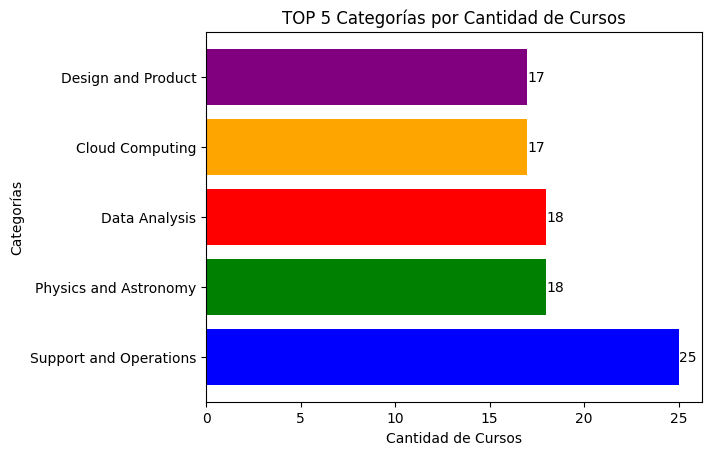

In [51]:
# Se obtien el TOP 5 de categorías
top_categorias = segmento_rating_categorias.head(5)

# Se configuran colores para las barras
colores = ['blue', 'green', 'red', 'orange', 'purple']

# Se crea el gráfico de barras horizontales
plt.barh(top_categorias.index, top_categorias.values, color=colores)

# Se agregan etiquetas de valores en las barras
for i, v in enumerate(top_categorias.values):
    plt.text(v, i, str(v), ha='left', va='center')

# Se configura título y etiquetas de los ejes
plt.title('TOP 5 Categorías por Cantidad de Cursos')
plt.xlabel('Cantidad de Cursos')
plt.ylabel('Categorías')

# Se muestra el gráfico
plt.show()



In [68]:
# Obtener el TOP 5 de categorías
segmento_rating_categorias = segmento_rating_categorias.head(5).sort_values(ascending=False)

# Crear el nuevo DataFrame con las categorías del TOP 5
segmento_rating_categorias_5 = segmento_rating[segmento_rating['category-subject-area'].isin(top_categorias.index)]

# Ordenar el nuevo DataFrame por la cantidad de cursos en cada categoría
segmento_rating_categorias_5 = segmento_rating_categorias_5.sort_values(by='category-subject-area', key=lambda x: x.map(top_categorias))

segmento_rating_categorias_5.head(3)

,url,title,associated-university-institution-company,type,image,category-subject-area,certificate-is-available,description,duration,language,level,prerequisites,price,rating,syllabus,timestamp
129,https://www.coursera.org/learn/introduction-to...,Introduction to Software Product Management,University of Alberta,course,https://s3.amazonaws.com/coursera_assets/meta_...,Design and Product,Shareable Certificate,This course highlights the importance and role...,Approx. 5 hours to complete,English,-,-,free,4.6,Module 1: Software Product Management - The Di...,2022-07-30T00:24:13Z
8,https://www.coursera.org/specializations/virtu...,Virtual Reality Specialization,-,specializations,https://s3.amazonaws.com/coursera_assets/meta_...,Design and Product,Shareable Certificate,This specialisation from the,Approximately 6 months to complete,English,Beginner Level,-,free,4.7,-,2022-07-30T00:00:07Z
140,https://www.coursera.org/learn/hybrid-cloud-se...,Hybrid Cloud Service Mesh with Anthos,Google Cloud,course,https://s3.amazonaws.com/coursera_assets/meta_...,Cloud Computing,Shareable Certificate,This on-demand course equips students to under...,Approx. 8 hours to complete,English,Intermediate Level,-,Enroll,4.8,Course Summary ~.~ Course Summary,2022-07-30T00:26:58Z


In [69]:
segmento_rating_categorias_5.shape

(95, 16)

In [70]:
# Se agrupan y cuentan las cantidades por "level" del dataframe rating
segmento_rating_level = segmento_rating['level'].value_counts()
segmento_rating_level


level
Beginner Level        136
Intermediate Level     34
-                      32
Advanced Level          4
Name: count, dtype: int64

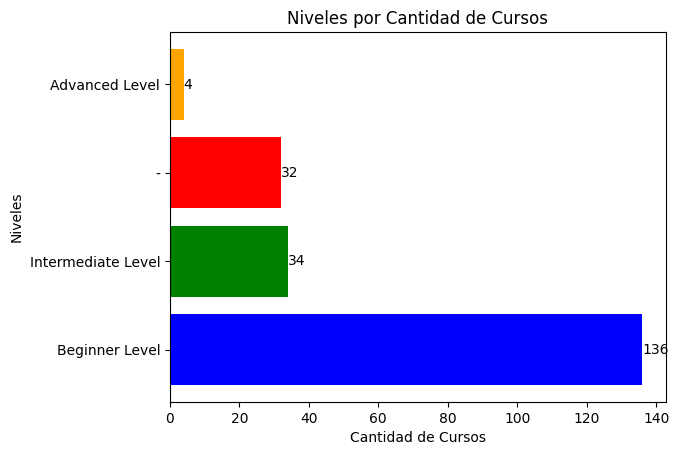

In [77]:
# Se obtien el TOP 5 de categorías
top_level = segmento_rating_level

# Se configuran colores para las barras
colores = ['blue', 'green', 'red', 'orange', 'purple']

# Se crea el gráfico de barras horizontales
plt.barh(top_level.index, top_level.values, color=colores)

# Se agregan etiquetas de valores en las barras
for i, v in enumerate(top_level.values):
    plt.text(v, i, str(v), ha='left', va='center')

# Se configura título y etiquetas de los ejes
plt.title('Niveles por Cantidad de Cursos')
plt.xlabel('Cantidad de Cursos')
plt.ylabel('Niveles')

# Se muestra el gráfico
plt.show()


In [83]:
segmento_rating_categorias_5_level = segmento_rating_categorias_5[segmento_rating_categorias_5['level'] != '-']
segmento_rating_categorias_5_level.shape

(84, 16)

In [86]:
segmento_rating_categorias_5_level = segmento_rating_categorias_5_level.sort_values(by='level', key=lambda x: x.map(top_level))
segmento_rating_categorias_5_level.head(3)

,url,title,associated-university-institution-company,type,image,category-subject-area,certificate-is-available,description,duration,language,level,prerequisites,price,rating,syllabus,timestamp
193,https://www.coursera.org/learn/capstone-mars-m...,Spacecraft Dynamics Capstone: Mars Mission,University of Colorado Boulder,course,https://s3.amazonaws.com/coursera_assets/meta_...,Physics and Astronomy,Shareable Certificate,The goal of this capstone spacecraft dynamics ...,Approx. 44 hours to complete,English,Advanced Level,-,free,4.7,Introduction to the Mission ~.~ The goal of th...,2022-07-30T00:37:27Z
202,https://www.coursera.org/learn/spacecraft-dyna...,Kinematics: Describing the Motions of Spacecraft,University of Colorado Boulder,course,https://s3.amazonaws.com/coursera_assets/meta_...,Physics and Astronomy,Shareable Certificate,The movement of bodies in space (like spacecra...,Approx. 28 hours to complete,English,Advanced Level,-,free,4.9,Introduction to Kinematics ~.~ This module cov...,2022-07-30T00:38:44Z
194,https://www.coursera.org/learn/spacecraft-dyna...,Kinematics: Describing the Motions of Spacecraft,University of Colorado Boulder,course,https://s3.amazonaws.com/coursera_assets/meta_...,Physics and Astronomy,Shareable Certificate,The movement of bodies in space (like spacecra...,Approx. 28 hours to complete,English,Advanced Level,-,free,4.9,Introduction to Kinematics ~.~ This module cov...,2022-07-30T00:37:27Z
